# Naive Baye
### Naive Bayes is a probabilistic supervised learning algorithm that applies Bayes' theorem to classify data points by calculating the probability of each class given the input features, assuming independence between them. It shines in classification tasks (e.g., distinguishing spam from ham emails based on word frequencies) and can be adapted for text or numerical data, requiring minimal training beyond estimating class probabilities. The algorithm assumes that features are conditionally independent given the class, which simplifies computation but may not hold perfectly in real-world scenarios like email content. Its strength lies in its efficiency and effectiveness with high-dimensional data (e.g., text), but it can struggle with correlated features and requires careful preprocessing for optimal performance.

### Use Naive Bayes as a quick prototype for projects, with adjustments to feature engineering (e.g., text tokenization) to enhance accuracy, especially for deployment in real-time email filtering systems.


| Aspect | Details |
| :- | :- |
| Use For           | Classification (e.g., spam email detection, sentiment analysis)<br>Can be extended to numerical data with Gaussian Naive Bayes |
| Key Assumptions   | - Conditional independence of features given the class<br>- Independent observations<br>- Sufficient data for probability estimation |
| Advantages        | - Highly efficient with minimal training time<br>- Effective for high-dimensional data (e.g., text)<br>- Interpretable probability outputs |
| Disadvantages     | - Sensitive to feature correlations<br>- Requires careful preprocessing (e.g., text normalization)<br>- Struggles with small datasets |
| Avoid When        | - Datasets with strong feature dependencies<br>- Very small samples with limited class representation<br>- Need for complex model relationships |
| Real-World Use Case | Spam email detection (e.g., classifying emails as spam or ham based on word patterns)<br>Sentiment analysis (e.g., determining positive/negative reviews) |

## Problem Description: 
### Classify email messages as either "spam" or "ham" (non-spam) based on their text content.

Using UCI SMS dataset https://archive.ics.uci.edu/dataset/228/sms+spam+collection

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

In [4]:
project_dir = './08_naive_bayes'

# load  dataset
data = pd.read_csv(project_dir + '/data/SMSSpamCollection', sep='\t', header=None, names=['label', 'text'])
print("Dataset loaded, shape:", data.shape)

# preprocess labels (convert 'ham'/'spam' to 0/1)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# select features and target 
X = data['text']  # text data as features
y = data['label']  # binary target (0 = ham, 1 = spam)
print("Features shape:", X.shape, "Target shape:", y.shape)

# convert text to feature vectors using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=5000)  # limit to 5000 most frequent words
X = vectorizer.fit_transform(X)
feature_names = vectorizer.get_feature_names_out()
print("Vectorized features shape:", X.shape)

Dataset loaded, shape: (5572, 2)
Features shape: (5572,) Target shape: (5572,)
Vectorized features shape: (5572, 5000)


In [5]:
# split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train set shape:", X_train.shape, "Test set shape:", X_test.shape)

Train set shape: (4457, 5000) Test set shape: (1115, 5000)


In [6]:
# train the Naive Bayes model (Multinomial for text data)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [7]:
# predict and evaluate the model
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

Accuracy: 0.99
Confusion Matrix:
[[960   6]
 [  7 142]]
Classification Report:
              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       966
        Spam       0.96      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



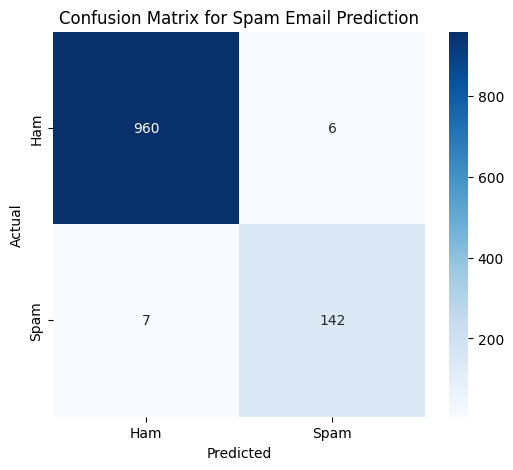

In [8]:
# visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Spam Email Prediction')
plt.show()

In [9]:
# save the trained model2 to a file using joblib for later use
model_dir = project_dir + '/model' 
os.makedirs(model_dir, exist_ok=True)
model_filename = os.path.join(model_dir, 'spam_email_nb_model.pkl')
joblib.dump(nb_model, model_filename)
vectorizer_filename = os.path.join(model_dir, 'spam_email_vectorizer.pkl')
joblib.dump(vectorizer, vectorizer_filename)
print(f'Model saved as {model_filename}')
print(f'Vectorizer saved as {vectorizer_filename}')

Model saved as ./08_naive_bayes/model/spam_email_nb_model.pkl
Vectorizer saved as ./08_naive_bayes/model/spam_email_vectorizer.pkl


In [10]:
# load the model and vectorizer, and run a prediction test
loaded_model = joblib.load(model_filename)
loaded_vectorizer = joblib.load(vectorizer_filename)
sample_text = ["Free money now, click here!"]  # Example spam email
sample_input = loaded_vectorizer.transform(sample_text)  # Transform sample text
sample_prediction = loaded_model.predict(sample_input)
print(f'Predicted label for sample input: {"Spam" if sample_prediction[0] == 1 else "Ham"}')

Predicted label for sample input: Ham
